In [11]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import os

TENSORBOARD_DIR = '../outputs/tensorboard'

def load_from_tensorboard(model_dir='dimp/DeT_DiMP50_Max'):
    log_dir_train = os.path.join(TENSORBOARD_DIR, "ltr", model_dir, "train")
    log_dir_test = os.path.join(TENSORBOARD_DIR, "ltr", model_dir, "val")
    ea_train = event_accumulator.EventAccumulator(log_dir_train)
    ea_train.Reload()
    ea_test = event_accumulator.EventAccumulator(log_dir_test)
    ea_test.Reload()
    print(ea_test.Tags()["scalars"])

    # Convert events to lists
    try:
        model_train_epochs = [e.step for e in ea_train.Scalars("Loss/total")]
        model_train_loss = [e.value for e in ea_train.Scalars("Loss/total")]
        model_train_iou = [e.value for e in ea_train.Scalars("Loss/iou")]
    except:
        model_train_epochs = []
        model_train_loss = []
        model_train_iou = []

    try:
        model_test_epochs = [e.step for e in ea_test.Scalars("Loss/total")]
        model_test_loss = [e.value for e in ea_test.Scalars("Loss/total")]
        model_test_iou = [e.value for e in ea_test.Scalars("Loss/iou")]
    except:
        model_test_epochs = []
        model_test_loss = []
        model_test_iou = []

    return {'Epochs': {'train': model_train_epochs, 
                       'test': model_test_epochs},
            'Loss': {'train': model_train_loss, 
                     'test': model_test_loss},
            'IoU Loss': {'train': model_train_iou, 
                     'test': model_test_iou},
            }


In [12]:
# for plotting

colors = {'Loss': {'train': '#7fc9ff', 
                     'test': '#0073e6'},
            'IoU Loss': {'train': '#ffa9a9', 
                    'test': '#e60000'},
            'F1': {'train': '#ffa9a9', 
                    'test': '#e60000'},
            }

font_size = 12

def plot(axes, i, model_metrics, metric_to_plot: str, model_name):
    axes[i].plot(model_metrics['Epochs']['train'], model_metrics[metric_to_plot]['train'], marker='o', color=colors[metric_to_plot]['train'], label='Train')
    axes[i].plot(model_metrics['Epochs']['test'], model_metrics[metric_to_plot]['test'], marker='o', color=colors[metric_to_plot]['test'], label='Test')
    axes[i].set_xlabel("Epochs", fontsize=font_size)
    axes[i].set_ylabel("Loss", fontsize=font_size)
    axes[i].set_title(model_name + ' ' + metric_to_plot, fontsize=font_size)
    axes[i].legend(fontsize=font_size)
    axes[i].grid(True)

In [13]:

# load merics

mvt_old_metrics = load_from_tensorboard('mvt/DeT_MVT_Max_34')
mvt_metrics = load_from_tensorboard('mvt/DeT_MVT_Max')
dimp_metrics = load_from_tensorboard('dimp/DeT_DiMP50_Max')


['Loss/total', 'Loss/iou', 'Loss/target_clf', 'Loss/test_init_clf', 'Loss/test_iter_clf', 'ClfTrain/test_loss', 'ClfTrain/test_init_loss', 'ClfTrain/test_iter_loss']
['Loss/total', 'Loss/iou', 'Loss/target_clf', 'Loss/test_init_clf', 'Loss/test_iter_clf', 'ClfTrain/test_loss', 'ClfTrain/test_init_loss', 'ClfTrain/test_iter_loss']
['Loss/total', 'Loss/iou', 'Loss/target_clf', 'Loss/test_init_clf', 'Loss/test_iter_clf', 'ClfTrain/test_loss', 'ClfTrain/test_init_loss', 'ClfTrain/test_iter_loss']


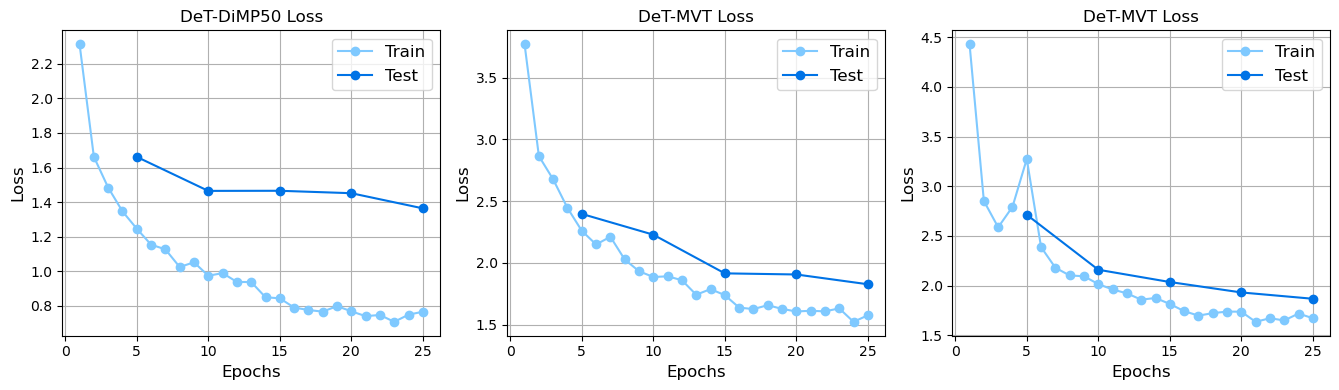

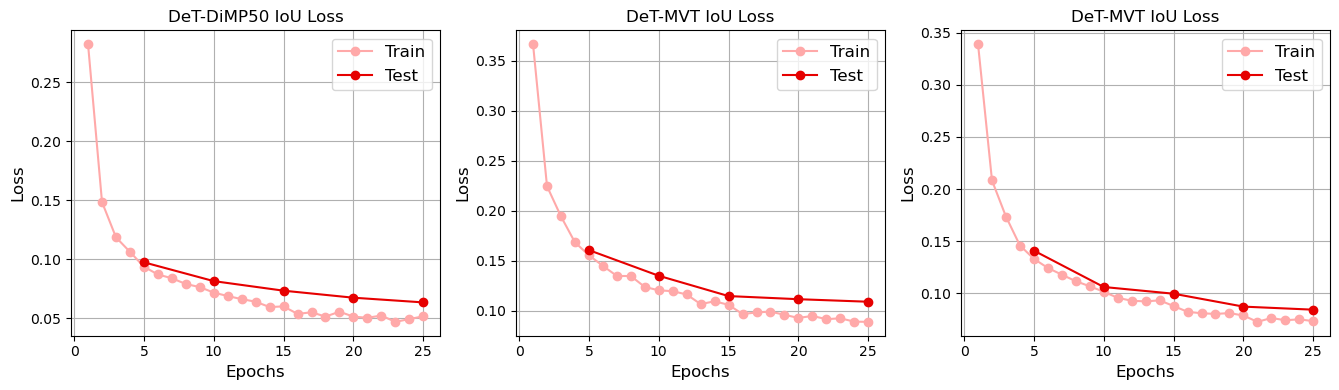

In [14]:
'''
new loss
'''

# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig, axes = plt.subplots(1, 3, figsize=(13.5, 4))
# fig, axes = plt.subplots(1, 4, figsize=(15, 3))

plot(axes, 0, dimp_metrics, 'Loss', 'DeT-DiMP50')
plot(axes, 1, mvt_metrics, 'Loss', 'DeT-MVT')
plot(axes, 2, mvt_old_metrics, 'Loss', 'DeT-MVT')

plt.tight_layout()
plt.show()

'''
new loss iou
'''

# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig, axes = plt.subplots(1, 3, figsize=(13.5, 4))
# fig, axes = plt.subplots(1, 4, figsize=(15, 3))

plot(axes, 0, dimp_metrics, 'IoU Loss', 'DeT-DiMP50')
plot(axes, 1, mvt_metrics, 'IoU Loss', 'DeT-MVT')
plot(axes, 2, mvt_old_metrics, 'IoU Loss', 'DeT-MVT')

plt.tight_layout()
plt.show()

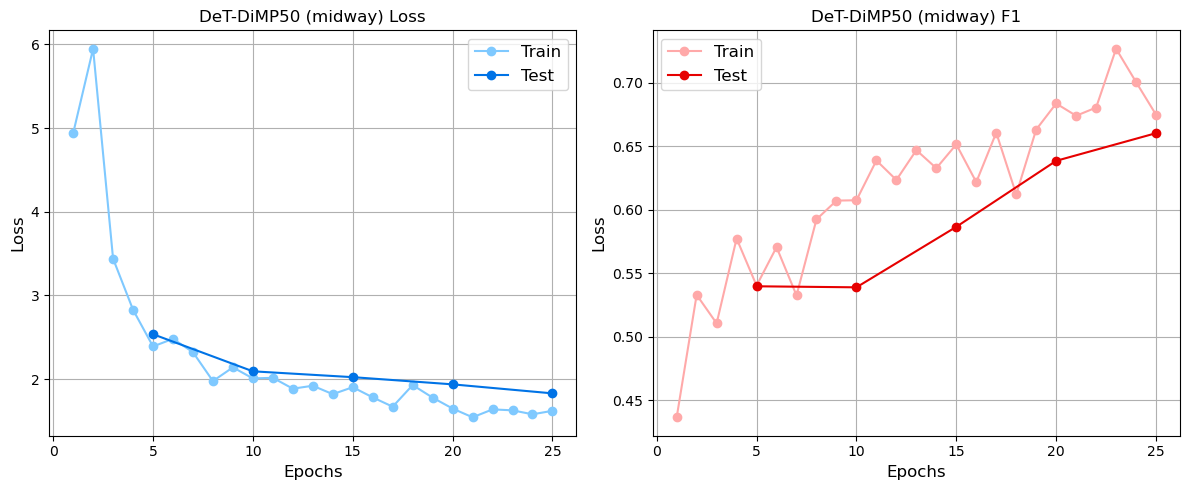

In [15]:
'''
old dimp loss and F1
'''

# midpoint checkin
dimp_train_epochs = [*range(1, 26)]
dimp_test_epochs = [*range(5, 26, 5)]
dimp_train_loss = [4.935275625, 5.9466931249999995, 3.4396006249999997, 2.829081875, 2.390564375, 2.481685, 2.322095, 1.977143125, 2.140895, 2.0088575, 2.01620875, 1.8862475, 1.92144625, 1.8208018750000001, 1.9040943750000001, 1.78237375, 1.6712056000000002, 1.92948125, 1.77917375, 1.64867, 1.544481875, 1.6388675, 1.627665, 1.580230625, 1.621875625]
dimp_test_loss = [2.53675, 2.093765, 2.023901875, 1.938004375, 1.8303375]
dimp_train_f1 = [0.43653875, 0.53293125, 0.510479375, 0.577248125, 0.540185625, 0.570471875, 0.53249625, 0.59236125, 0.607114375, 0.607395, 0.63870625, 0.623368125, 0.646841875, 0.63264, 0.6514, 0.621670625, 0.6606048, 0.61206, 0.663041875, 0.68356375, 0.67390375, 0.6803525, 0.726651875, 0.700449375, 0.674739375]
dimp_test_f1 = [0.53967, 0.538851875, 0.5864725, 0.638429375, 0.660201875]
dimp_old_metrics = {'Epochs': {'train': dimp_train_epochs, 
                            'test': dimp_test_epochs},
                    'Loss': {'train': dimp_train_loss, 
                            'test': dimp_test_loss},
                    'F1': {'train': dimp_train_f1, 
                            'test': dimp_test_f1},
                    }


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# fig, axes = plt.subplots(1, 4, figsize=(15, 3))

plot(axes, 0, dimp_old_metrics, 'Loss', 'DeT-DiMP50 (midway)')
plot(axes, 1, dimp_old_metrics, 'F1', 'DeT-DiMP50 (midway)')

plt.tight_layout()
plt.show()